In [ ]:
# Start writing code here...

# Start writing code here...
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

Shape of X: (200, 2)
Shape of y: (200,)
Shape of X after preparation for NN: (2, 200)
Shape of y after preparation for NN: (1, 200)


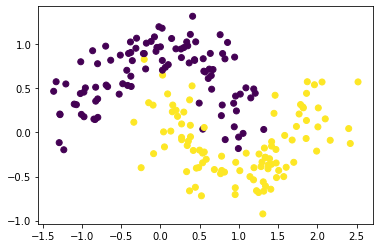

In [ ]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure  = load_extra_datasets()
data = noisy_moons
X, y  = data[0], data[1]
plt.scatter(X[:, 0], X[:, 1], c = y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

X = X.T
y = y.reshape((1, len(y)))

print("Shape of X after preparation for NN:", X.shape)
print("Shape of y after preparation for NN:", y.shape)

In [ ]:
# define the structure of your NN

n_x = X.shape[0]
n_h1 = 4
n_h2 = 4
n_y = y.shape[0]

# give the initial values for W, b
W1 = np.random.randn(n_h1, n_x) * 0.01
b1 = np.zeros((n_h1, 1))
W2 = np.random.randn(n_h2, n_h1) * 0.01
b2 = np.zeros((n_h2, 1))
W3 = np.random.randn(n_y, n_h2) * 0.01
b3 = np.zeros((n_y, 1))


learning_rate = 0.001
epoch = 10000
m = len(X)
errors = []
for i in range(epoch):

    # forward propogation

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Caclulate the cost
    logprobs = np.multiply(np.log(A3),y) +  np.multiply(np.log(1-A3), (1-y))
    cost = -1/m*np.sum(logprobs)
    cost = np.squeeze(cost)
    errors.append(cost)

    # Backward prop
    dZ3 = A3 - y
    dW3 = 1/m * np.dot(dZ3, A2.T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = np.dot(W3.T, dZ3) * (1 - np.power(A2, 2))
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    # Update parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3

    
    

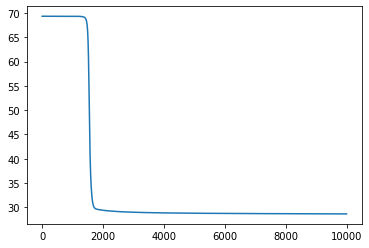

In [ ]:
plt.plot(range(epoch), errors)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7cfb99c-1183-402c-9906-ac4b08b6b2b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>